# **Sentiment Analysis of Restaurant Reviews**

# Import libraries

In [ ]:
# Connecting Google Drive with google colab

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Import essential libraries

import numpy as np     #linear  algebra
import pandas as pd    #data processing, csv file I/O

# Exploratory Data Analysis

Load and Prepare Data



In [ ]:
# Loading the dataset
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis of Restaurant Reviews/Restaurant_Reviews.tsv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Restaurant_Reviews.tsv', delimiter='\t', quoting = 3)

In [ ]:
# Shape = tuple of array dimension (row, column)
data.shape

(1000, 2)

In [ ]:
# Returns the label of each column in dataframe
data.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
# View the data
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
# Information about the dataframe
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

# Data Preprocessing

In [ ]:
# Importing essential libraries for for performing Natural Language Processing on 'Restaurant_Reviews.tsv' datset

import nltk  # Natural Language Toolkit, as a Python package that you can use for NLP.
import re    # Python has a built-in package called re, which can be used to work with Regular Expressions.
nltk.download('stopwords')   # The NLTK Corpus is a massive dump of all kinds of natural language datasets that are definitely worth taking a look at.
from nltk.corpus import stopwords   # A stopword is a commonly used word (such as 'the', 'in', 'an', 'a')that a search engine has been programmed to ignore.
from nltk.stem.porter import PorterStemmer    # Poters Stemmer is a type of stemmer which is mainly known for Data Mining and Information Retrieval.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Cleaning the reviews
corpus = []
for i in range(0, 1000):  # 1000 records

    # Cleaning special characters from the reviews
    # The re.sub() method performs global search and global replace on the given string.
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['Review'][i])

    # Converting the entire review into lowercase
    review = review.lower()

    # Tokenizing the review by words
    review_words = review.split()

    # Removing the stop words
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]  # Stopwords are the English words which do not add much meaning to a sentence

    # Stemming the words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    # Joining the stemmed words
    review = ' '.join(review)

    # Creating a corpus
    corpus.append(review)



In [ ]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
# Creating the Bag of words
from sklearn.feature_extraction.text import CountVectorizer     #CountVectorizer is a method to convert text to numerical data
cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

# Split Data - (1000, 1500)

* In this step we are going to split data in two parts(training and testing), so that we can train our model on training dataset and test its accuracy on unseen test data.

In [ ]:
from sklearn.model_selection import train_test_split      # Use to split original data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# random_state simply sets seed to the random generator, so that yout train-test splits are always detrministics. If you dont set seed, It is different each time.

#Training (1000,1500)
#1000*80/100 = 800
#1000*20/100 = 200


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

Takeaway Key Points:
  * Usually we take more and more data in training so its easy for the model to learn with more data.

# Model Training


* As we have done with the preprocessing part, it is time to train our model. Im going to train model.

* **Multinomial Naive Bayes-** The algorithm is probabilistic learning method that is mostly used in Natural Language Processing(NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article.

In [ ]:
# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB

# The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).

classifier = MultinomialNB()
classifier.fit(x_train,y_train)     # fit training data

MultinomialNB()

In [ ]:
# Predicting the test set results
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
# Accuracy, Precision and Recall

from sklearn.metrics import accuracy_score
# In Python, the accuracy_score function of the sklearn. metrics package calculates the accuracy score for a set of predicted labels against the true labels.

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)


print("---- Scores ----")
print("Accuracy Score is: {}%".format(round(score1*100,2)))
print("Precision Score is: {}%".format(round(score2*100,2)))
print("Recall Score is: {}%".format(round(score3*100,2)))

---- Scores ----
Accuracy Score is: 76.5%
Precision Score is: 76.42%
Recall Score is: 78.64%


In [ ]:
# Making the Confusion Metrix
# A Confusion Matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of classification

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual Values')

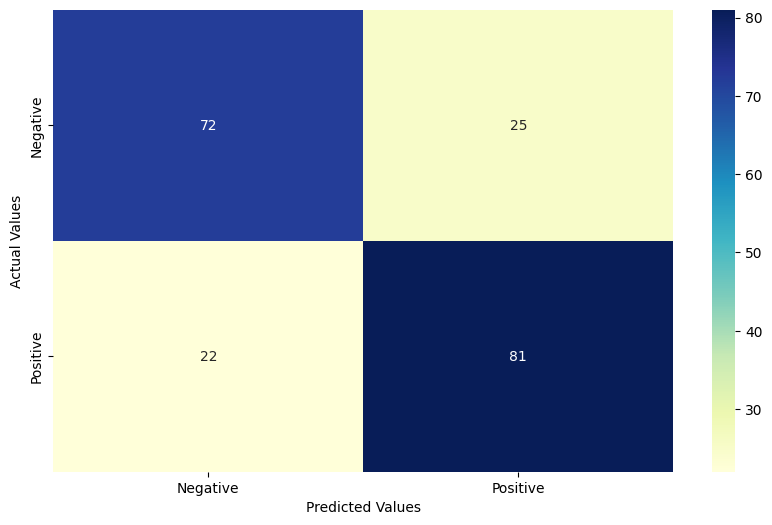

In [ ]:
# Plotting the confusion matrix

import matplotlib.pyplot as plt     # Matplotlib is a low level graph plotting library in python that serves as a visualization utility
import seaborn as sns               # Seaborn is a Python data visualzation library based on matplotlib

%matplotlib inline

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')


In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha = i)
  temp_classifier.fit(x_train, y_train)
  temp_y_pred = temp_classifier.predict(x_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
      best_accuracy = score
      alpha_val = i
print("---------------------------------------------------------------------------")
print("The best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2), round(alpha_val,1)))



Accuracy score for alpha=0.1 is: 78.0%
Accuracy score for alpha=0.2 is: 78.5%
Accuracy score for alpha=0.3 is: 78.0%
Accuracy score for alpha=0.4 is: 78.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 77.5%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 76.5%
Accuracy score for alpha=1.0 is: 76.5%
---------------------------------------------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


In [ ]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(x_train,y_train)

MultinomialNB(alpha=0.2)

# Prediction

In [ ]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string = sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    stop_words = set(stopwords.words('english'))


    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [ ]:
# Prdicting Values
sample_review = 'The food is really bad.'
if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review.')

This is a NEGATIVE review.


In [ ]:
# Prdicting Values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review.')

This is a NEGATIVE review.


In [ ]:
# Prdicting Values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing .'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review.')

This is a POSITIVE review.
